# LAB: Multiple Correspondence Analysis sobre datos de opinión pública

## Introducción

En este caso, trabajaremos con datos de una encuesta de opinión pública realizada en la CABA en el año 2007. Uno de los objetivos de la encuesta era encontrar predictores sobre el autoposicionamiento ideológico de la población. Para ello se realizaron una serie de afirmaciones (vinculadas al rol del estado, a ciertos derechos y al tipo de políticas necesarias para combatir la inseguridad) y se solicitó a los entrevistados que respondieran su nivel de acuerdo con dichas afirmaciones.

A los efectos de este LAB hemos recodificado las respuestas en tres grupos: 
    
   - Acuerdo (Muy o bastante de acuerdo)
   - Desacuerdo (muy o bastante en desacuerdo)
   - No sabe
   
**Objetivo:** Tenemos dos objetivos:

1. representar el dataset en un espacio bidimensional formado por las X afirmaciones relevadas
2. encontrar patrones en las respuestas de los encuestados


In [65]:
import mca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv("../Data/eti285.csv")

# Podemos generar las variables dummies nosotros
df2 = pd.get_dummies(df.iloc[:,range(33,df.shape[1])])

In [67]:
# MCA tiene un método para generar las dummies de forma directa
# Dropeamos las columnas que no vamos a usar

df3 = df.drop(['Unnamed: 0', 'id', 'interes_politica', 'diario_mas_lee',
       'grupos_influencia_su_opinion', 'autoposicionamiento_ideologico',
       'autoposicionamiento_partidario', 'eval_gestion_NK',
       'eval_futura_situacion_pais', 'progresismo_conservadurismo',
       'nivel_nacionalismo', 'voto_comparado',
       'voto_anterior_presidencial_2007', 'voto_anterior_caba_2006',
       'pogr_estado_propietario_empresas', 'pogr_estado_interventor',
       'cons_universidades_estatales_aranceladas',
       'progr_adopcion_parejas_gay', 'cons_aumentar_penas',
       'cons_bajar_edad_imputabilidad', 'pogr_control_precios_estado', 'sexo',
       'edad', 'estud', 'trabajo', 'distrito', 'salud', 'pon','R_interes_politica', 
        'R_autoposicionamiento_ideologico', 'R_eval_gestion_NK', 
        'R_progresismo_conservadurismo', 'R_nacionalismo'],axis=1)


# Llamamos al método mca.dummy

df3 = mca.dummy(df3)

Observermos la inercia y la proporción de la varianza explicada.

In [68]:
mca_ind = mca.MCA(df2, ncols=10)

In [69]:
mca_ind.inertia

0.1853034942097215

Podemos ver que con dos factores logramos explicar alrededor del 78% de la varianza.

In [70]:
data = np.array([mca_ind.L[:4], 
                 mca_ind.expl_var(greenacre=False, N=4) * 100]).T
df = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,5))
df

,cλ,%c
1,0.088187,47.590751
2,0.080694,43.546670
3,0.011368,6.134751
4,0.003049,1.645650


In [71]:
mca_ind.expl_var(greenacre=False, N=2)

array([ 0.47590751,  0.4354667 ])

### Análisis gráfico

Recuperamos las funciones para plotear las filas y columnas en el espacio bidimensional.

In [72]:
def plot_factors_ind_mca(mca_object, X):
    
    ''' Plot individuals in two first factors of MCA Analysis Arguments:
        #################################################
        
        mca_objet: object with MCA model
        X: DataFrame with data
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    
    points = mca_object.fs_r(N=2).T
    labels = list(X.index)
    
    fig, ax = plt.subplots()
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    ax.scatter(points[0], points[1])
   
    for label, x, y in zip(labels, *points):
        plt.annotate(label, xy=(x, y))
    
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')

Observemos ahora como se agrupan los casos en el espacio bidimensional

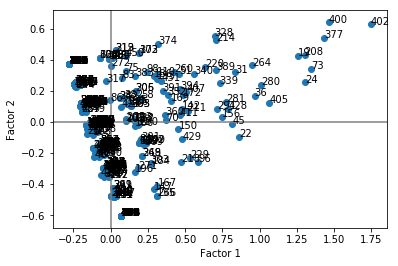

In [77]:
plot_factors_ind_mca(mca_ind, df2)

¿Qué representa el espacio bidimensional? Para avanzar en la interpretación, podemos plotear las variables dummy generadas.

El cuadrante 2 pareciera agrupar las respuestas más vinculadas a posiciones progresistas:
    
   - Acuerdo con intervención estatal
   - Desacuerdo con incremento de penas
   - Desacuerdo con arancelamiento de universidades

El tercer cuadrante pareciera agrupar a los más indecisos.

El cuadrante cuatro, las posiciones más conservadoras:
    
   - Acuerdo con incremento de penas
   - Desacuerdo con propiedad estatal del empresas de servicios
   - Acuerdo con arancelamiento de universidades, etc.

### Capacidad de clasificación de los componentes utilizados

Veamos ahora en qué medida la reducción de la dimensionalidad efectuada permite realizar una clasificación adecuada del autoposicionamiento ideológico de los entrevistados.